Question 1: Total Annual Sales: $41200
Question 2: Mean: 3433.3333333333335, Median: 3400.0, Standard Deviation: 192.93061504650376
Question 3: Highest Spending: $3800, Lowest Spending: $3100
Question 4: Correlation Matrix:
               Price  Units Sold   Revenue
Price       1.000000    1.000000  0.994265
Units Sold  1.000000    1.000000  0.994265
Revenue     0.994265    0.994265  1.000000
Question 5: Moving Average: [3233.33333333 3333.33333333 3300.         3400.         3466.66666667
 3633.33333333 3700.         3633.33333333 3466.66666667 3400.        ]
Question 6: Dataset Description:
            Price  Units Sold        Revenue
count    5.000000    5.000000       5.000000
mean   200.000000  700.000000  150000.000000
std     79.056942  158.113883   87464.278423
min    100.000000  500.000000   50000.000000
25%    150.000000  600.000000   90000.000000
50%    200.000000  700.000000  140000.000000
75%    250.000000  800.000000  200000.000000
max    300.000000  900.000000  270000.00

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


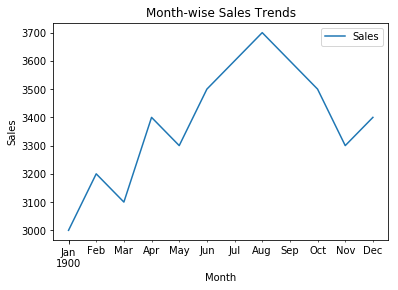

Question 11: Training set size: (4, 2), Test set size: (1, 2)
Question 12: Predicted Revenue: [97142.85714286]
Question 13: Scaled Features:
[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


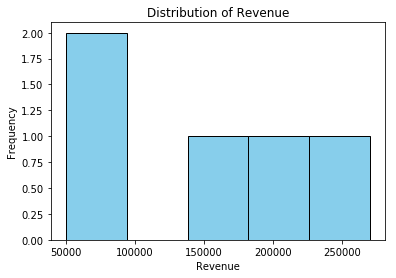

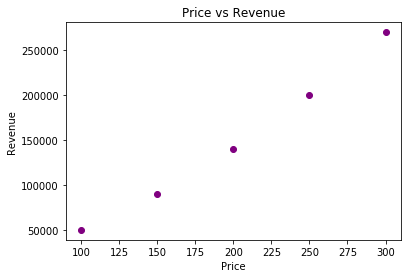

Question 16: Z-scores for Revenue:
0   -1.143324
1   -0.685994
2   -0.114332
3    0.571662
4    1.371989
Name: Revenue, dtype: float64
Question 17: Revenue by Category:
Category
Clothing       250000
Electronics    360000
Furniture      140000
Name: Revenue, dtype: int64
Question 18: Pivot Table of Revenue by Category:
Category  Clothing  Electronics  Furniture
Revenue     250000       360000     140000


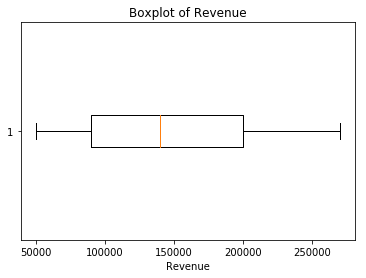

Question 20: Correlation between Price and Revenue: 0.9942645983355075


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Sample Data (For the sake of demonstration)
sales = np.array([3200, 3400, 3100, 3500, 3300, 3400, 3700, 3800, 3600, 3500, 3300, 3400])
products_data = pd.DataFrame({
    'Product': ['A', 'B', 'C', 'D', 'E'],
    'Price': [100, 150, 200, 250, 300],
    'Units Sold': [500, 600, 700, 800, 900],
    'Revenue': [50000, 90000, 140000, 200000, 270000]
})

# 1. Calculate Total Annual Sales
total_annual_sales = np.sum(sales)
print(f"Question 1: Total Annual Sales: ${total_annual_sales}")

# 2. Calculate Mean, Median, and Standard Deviation of Monthly Sales
mean_sales = np.mean(sales)
median_sales = np.median(sales)
std_sales = np.std(sales)
print(f"Question 2: Mean: {mean_sales}, Median: {median_sales}, Standard Deviation: {std_sales}")

# 3. Calculate Highest and Lowest Spending
highest_spending = np.max(sales)
lowest_spending = np.min(sales)
print(f"Question 3: Highest Spending: ${highest_spending}, Lowest Spending: ${lowest_spending}")

# 4. Calculate Correlation Matrix
correlation_matrix = products_data.corr()
print(f"Question 4: Correlation Matrix:\n{correlation_matrix}")

# 5. Calculate Moving Average (Simple Moving Average for 3 months)
moving_avg = np.convolve(sales, np.ones(3)/3, mode='valid')
print(f"Question 5: Moving Average: {moving_avg}")

# 6. Describe the Dataset (Summary Statistics)
print(f"Question 6: Dataset Description:\n{products_data.describe()}")

# 7. Identify Top 5 Best Selling Products by Revenue
top_5_products = products_data.sort_values(by='Revenue', ascending=False)
print(f"Question 7: Top 5 Best Selling Products:\n{top_5_products}")

# 8. Handle Missing Values in the Dataset (Imputation)
# Let's introduce a missing value in the dataset for demonstration
products_data['Units Sold'][2] = np.nan
products_data['Units Sold'] = products_data['Units Sold'].fillna(products_data['Units Sold'].mean())
print(f"Question 8: Dataset with Missing Values Handled:\n{products_data}")

# 9. One-Hot Encoding (Handling Categorical Data)
# For example, assuming we have a 'Category' column with some product categories
categories = ['Clothing', 'Electronics', 'Furniture']
products_data['Category'] = ['Clothing', 'Electronics', 'Furniture', 'Clothing', 'Electronics']
encoder = OneHotEncoder(sparse=False)
encoded_categories = encoder.fit_transform(products_data[['Category']])

# Add one-hot encoded columns back to the dataset
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.categories_[0])
products_data = pd.concat([products_data, encoded_df], axis=1)
print(f"Question 9: One-Hot Encoded Data:\n{products_data}")

# 10. Perform time-series analysis: extract month-wise sales trends from a dataset.
sales_trend = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'Sales': [3000, 3200, 3100, 3400, 3300, 3500, 3600, 3700, 3600, 3500, 3300, 3400]
})

# Convert 'Month' column to datetime format and set it as the index
sales_trend['Month'] = pd.to_datetime(sales_trend['Month'], format='%b')
sales_trend.set_index('Month', inplace=True)

# Plotting the time-series sales data
ax = sales_trend.plot(y='Sales', title="Month-wise Sales Trends")
ax.set_xlabel("Month")  # Set x-axis label
ax.set_ylabel("Sales")  # Set y-axis label
plt.show()

# 11. Train a linear regression model to predict sales based on historical data.
X = products_data[['Price', 'Units Sold']]  # Features
y = products_data['Revenue']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Question 11: Training set size: {X_train.shape}, Test set size: {X_test.shape}")

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)
print(f"Question 12: Predicted Revenue: {y_pred}")

# 13. Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Question 13: Scaled Features:\n{X_scaled}")

# 14. Visualizing Distribution of Revenue using Histogram
plt.hist(products_data['Revenue'], bins=5, color='skyblue', edgecolor='black')
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

# 15. Visualizing Price vs Revenue using Scatter Plot
plt.scatter(products_data['Price'], products_data['Revenue'], color='purple')
plt.title("Price vs Revenue")
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.show()

# 16. Calculate the z-scores for revenue (Standardized Values)
z_scores = (products_data['Revenue'] - products_data['Revenue'].mean()) / products_data['Revenue'].std()
print(f"Question 16: Z-scores for Revenue:\n{z_scores}")

# 17. Performing Data Aggregation (Grouping by Category and Calculating Sum of Revenue)
category_revenue = products_data.groupby('Category')['Revenue'].sum()
print(f"Question 17: Revenue by Category:\n{category_revenue}")

# 18. Create a Pivot Table (Example: Pivot table of Sales by Category and Month)
pivot_table = pd.pivot_table(products_data, values='Revenue', columns='Category', aggfunc=np.sum)
print(f"Question 18: Pivot Table of Revenue by Category:\n{pivot_table}")

# 19. Create a boxplot to visualize revenue distribution
plt.boxplot(products_data['Revenue'], vert=False)
plt.title("Boxplot of Revenue")
plt.xlabel("Revenue")
plt.show()

# 20. Calculate the correlation between Price and Revenue, and interpret the result
price_revenue_corr = products_data[['Price', 'Revenue']].corr().iloc[0, 1]
print(f"Question 20: Correlation between Price and Revenue: {price_revenue_corr}")
